In [5]:
# Anomoly Detection using Autoencoder

In [46]:
import numpy as np
import pandas as pd

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Dropout
from tensorflow.keras import layers, models

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
Path = 'http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv'
df= pd.read_csv(Path, header=None)

In [51]:
df.drop(140,axis=1)

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.513738,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.123739,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,0.205543,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.218185,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932


In [52]:
# Preprocess

In [81]:
(x_train, x_test)= train_test_split( df,test_size=0.2)

In [82]:
# Model Architecture

In [83]:
encoder=keras.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    
])

In [84]:
decoder=keras.Sequential([
    layers.Input(shape=[8,]),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(x_train.shape[1], activation='linear'
                )
    
])

In [85]:
model=keras.models.Sequential([

    encoder, decoder
])

In [86]:
# Compiling model

In [87]:
model.compile(optimizer='adam',
              loss='mean_squared_error')

In [88]:
# Train model

In [89]:
history = model.fit(
    x_train, 
    x_train, 
    validation_data=(x_test,x_test),
    epochs=10,
    batch_size = 30,
    shuffle=True
)

Epoch 1/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7617 - val_loss: 0.1926
Epoch 2/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1683 - val_loss: 0.1365
Epoch 3/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1228 - val_loss: 0.1057
Epoch 4/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0949 - val_loss: 0.0796
Epoch 5/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0760 - val_loss: 0.0727
Epoch 6/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0732 - val_loss: 0.0694
Epoch 7/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0671 - val_loss: 0.0646
Epoch 8/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0614 - val_loss: 0.0604
Epoch 9/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0571 - val_loss: 0.0572
Epoch 10/10
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0533 - val_loss: 0.0555


In [90]:
history=model.fit(x_train,x_train, validation_data=(x_test, x_test), epochs=10, batch_size =20, shuffle=True)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0545 - val_loss: 0.0541
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0547 - val_loss: 0.0516
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0496 - val_loss: 0.0487
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0489 - val_loss: 0.0466
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0464 - val_loss: 0.0462
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0447 - val_loss: 0.0448
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0447 - val_loss: 0.0441
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0433 - val_loss: 0.0435
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0429 - val_loss: 0.0430
Epoch 10/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0415 - val_loss: 0.0425


<Axes: >

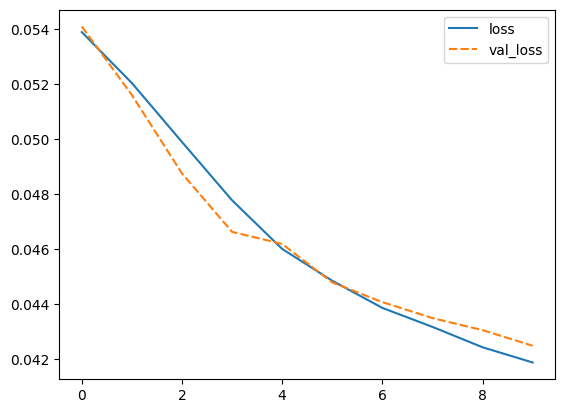

In [91]:
import seaborn as sns
sns.lineplot(history.history)

In [92]:
prediction= model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [93]:
mse=np.mean(np.power(x_test-prediction,2),axis=1)

In [95]:
threshold= np.percentile(mse, 95)

In [96]:
anomoly= mse> threshold

In [97]:
#calculate anomoly

In [104]:
ano= np.sum(anomoly)
print(f"the value is:{ano}")

the value is:50


In [105]:
# Plotting anomoly

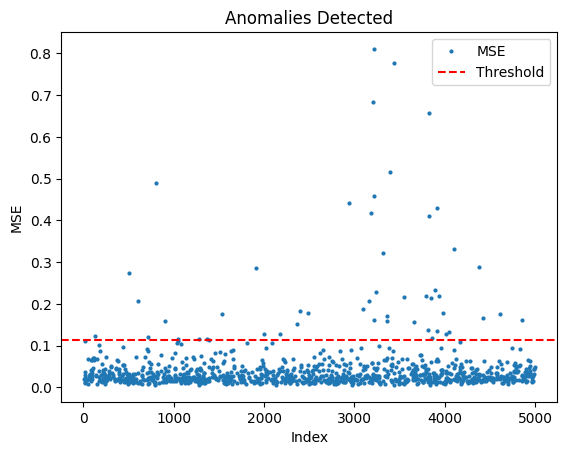

In [109]:
plt.plot(mse, marker='o', linestyle='',markersize=2, label="MSE")
plt.axhline(threshold, color='r', linestyle='--', label="Threshold")
plt.xlabel('Index')
plt.ylabel('MSE')
plt.title('Anomalies Detected')
plt.legend()
plt.show()